In [1]:
import os
from os import listdir
from os.path import isfile, join

import pandas as pd
import numpy as np

from skimage.external import tifffile
from skimage.external.tifffile import imread

import matplotlib.pyplot as plt

from itertools import islice

### directory setting

In [2]:
bigDir=r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading\20200207_new data'

file=f'{bigDir}\\cellinfo_200203_v2.csv'
data=pd.read_csv(file)

In [6]:
data.head()

,Unnamed: 0,file,original cell name,movie,last frame movie position x,last frame movie position y,ab1 (MCM),ab1 ch,ab2 (heterochromatin),ab2 ch,DAPI ch,category,molecular age,physical age [min],imaging core,cell id for tracking,group,path
0,1,20200203_cell_00.ciz,20200203-06-13-63X 16bit,20200203 simcmxy06,647.518,153.039,MCM3,1.0,HP1beta,2.0,3.0,early G1,0.225,80min,HIC,NaN,siLuc,Z:\CookLab\Liu\20190816_organizedData_MCM_load...
1,2,20200203_cell_01.ciz,20200203-06-25-63X 16bit,20200203 simcmxy06,1490.165,332.591,MCM3,1.0,HP1beta,2.0,3.0,early G1,0.414,20min,HIC,NaN,siLuc,Z:\CookLab\Liu\20190816_organizedData_MCM_load...
2,3,20200203_cell_02.ciz,20200203-06-27-63X 16bit,20200203 simcmxy06,1560.535,380.034,MCM3,1.0,HP1beta,2.0,3.0,early G1,0.510,20min,HIC,NaN,siLuc,Z:\CookLab\Liu\20190816_organizedData_MCM_load...
3,4,20200203_cell_03.ciz,20200203-06-29-63X 16bit,20200203 simcmxy06,930.763,391.252,MCM3,1.0,HP1beta,2.0,3.0,middel G1,0.684,350min,HIC,NaN,siLuc,Z:\CookLab\Liu\20190816_organizedData_MCM_load...
4,5,20200203_cell_04.ciz,20200203-06-51-63X 16bit,20200203 simcmxy06,1653.035,635.701,MCM3,1.0,HP1beta,2.0,3.0,middel G1,0.376,190min,HIC,NaN,siLuc,Z:\CookLab\Liu\20190816_organizedData_MCM_load...


### setting one cell

In [3]:
myCell=data.iloc[0]

In [7]:
myCell.path

'Z:\\CookLab\\Liu\\20190816_organizedData_MCM_loading\\20200207_new data\\data_tiff\\20200203_cell_00.tif'

In [4]:
## opening cell image
myImage=imread(myCell.path) 

### let's use MCM channel for this example

We know that MCM channel for this dataset is the 1st channel. Since python's numbering starts from 0, we can set the channel as 0 for the MCM channel. 

In [8]:
# for this example
channel=0 

We can see the shape of the image by using:

> myImage.shape


In [7]:
myImage.shape

(22, 3, 380, 380)

By using this, we can see that this is an 4-dimensional image. For this particular cell image, this image has  
***22 slides*** and ***3 channels***, and each slides has ***380 pixel by 380 pixels***.

<IPython.core.display.Javascript object>


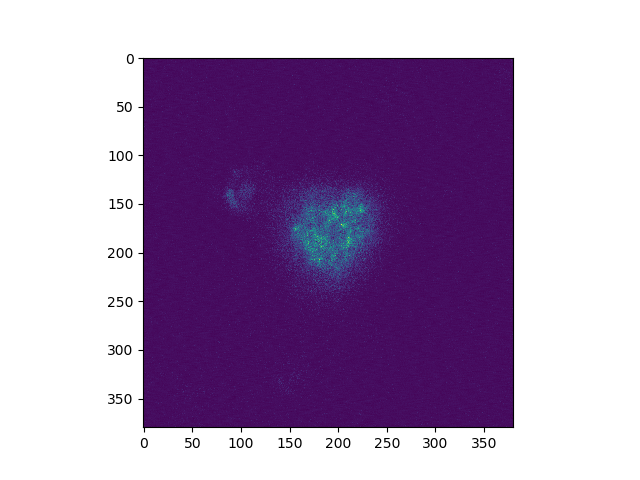

In [12]:
%matplotlib notebook
plt.imshow(myImage[15,0,:,:])

<IPython.core.display.Javascript object>


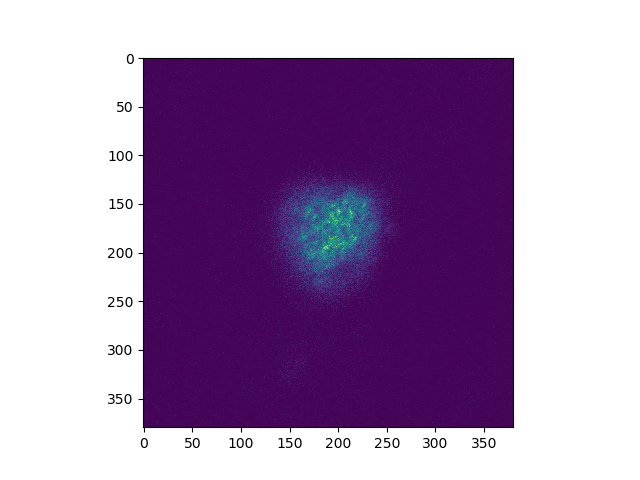

In [10]:
%matplotlib notebook
plt.imshow(myImage[15,1,:,:])

<IPython.core.display.Javascript object>


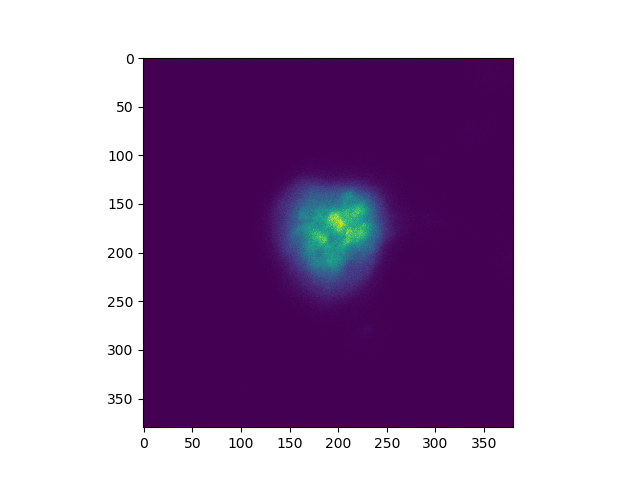

In [11]:
%matplotlib notebook
plt.imshow(myImage[15,2,:,:])

Using the Matplotlib notebook, you can see the image for the selected slide and channel.

### Calculating MCM signal for total nucleus pixels

In [25]:
myIm=myImage.copy() # I copied the image and saved to a new object just in case any changes will be made to the original one 
myChannel=myIm[:,channel,:,:] # Selecting just the channel - this will make myChannel to be 3-dimensional

In [26]:
myChannel.shape

(22, 380, 380)

In [13]:
myCell.path

'Z:\\CookLab\\Liu\\20190816_organizedData_MCM_loading\\20200207_new data\\data_tiff\\20200203_cell_00.tif'

In [14]:
maskpath=myCell.path.replace('data_tiff','segmentation_nucleus_Otsu')
maskpath=maskpath.replace('.tif','_nucleus.tif')
mask=imread(maskpath)

In [15]:
maskpath

'Z:\\CookLab\\Liu\\20190816_organizedData_MCM_loading\\20200207_new data\\segmentation_nucleus_Otsu\\20200203_cell_00_nucleus.tif'

<IPython.core.display.Javascript object>


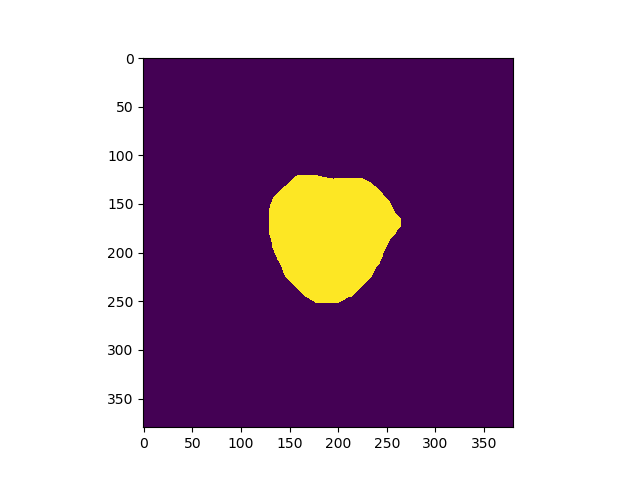

In [18]:
%matplotlib notebook
plt.imshow(mask[10])

In [19]:
mask.dtype

dtype('uint8')

In [21]:
mask[15,150,:]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 25

In [22]:
## changing mask type to binary
mask=mask.astype(bool)


In [23]:
mask[15,150,:]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [27]:
## masking the image
myChannel[~mask]=0

In [28]:
myChannel[15,150,:]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0, 1186, 1656, 1247,
       1052, 1805, 1632, 1591, 2049, 1610, 2159, 12

<IPython.core.display.Javascript object>


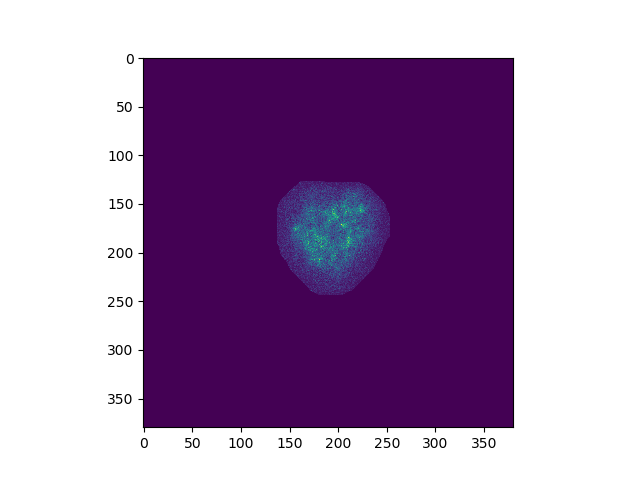

In [29]:
%matplotlib notebook
plt.imshow(myChannel[15])

In [30]:
myChannel.shape

(22, 380, 380)

In [18]:
myChannel.sum(-1).shape

(22, 380)

In [16]:
myChannel.sum(-1).sum(-1)

array([       0, 16825387, 23810997, 32932247, 47484553, 68692220,
       79302176, 81297760, 80335902, 77519368, 72631547, 66540043,
       58695925, 51021709, 43669363, 37741078, 30985745, 23983679,
       17908496, 13327368,  9991878,  8086402], dtype=uint32)

In [19]:
myChannel.sum(-1).sum(-1).shape

(22,)

In [31]:
np.sum(myChannel.sum(-1).sum(-1))

942783843

In [20]:
np.sum(myChannel)

942783843

### using this method to calculate different signals and masks

In [ ]:

### for the column names
pixels=['total','het','eu']
components=['nuc','inner','outer']

### for image names
dirs=['segmentation_nucleus_Otsu','erosion_nuc_mask','erosion_nuc_mask',
      'segmentation_20','segmentation_20_erosion','segmentation_20_erosion',
     'segmentation_20_eu','segmentation_20_eu_erosion','segmentation_20_eu_erosion',]

files=['_nucleus.tif','_eroded_9^5_inner_mask_20.tif','_eroded_9^5_outer_mask_20.tif',
           '_hetChrom.tif', '_hetChrom_inner.tif', '_hetChrom_outer.tif',
           '_euChrom.tif', '_euChrom_inner.tif','_euChrom_outer.tif']

## making a dummy dataframe to store the signal calculations
df=pd.DataFrame(columns=['nuc_vol_total','inner_vol_total','outer_vol_total',
                         'nuc_mcm_total','inner_mcm_total','outer_mcm_total',
                        'nuc_vol_het','inner_vol_het','outer_vol_het',
                         'nuc_mcm_het','inner_mcm_het','outer_mcm_het',
                         'nuc_vol_eu','inner_vol_eu','outer_vol_eu',
                        'nuc_mcm_eu','inner_mcm_eu', 'outer_mcm_eu'])

## signals calculated
for k in range(len(pixels)):
    for j in range(len(components)):
        ## copying image every time new signal is calculated
        myIm=myImage.copy()
        myChannel=myIm[:,mcm,:,:] 

        ## column name set up based on the component and the pixels
        currColName=f'{components[j]}_mcm_{pixels[k]}'

        ## opening mask images
        ### the indexing is in such way so that the image opened matches up with the name being used for calculation
        direc=myCell.path.replace('data_tiff',dirs[(j)+(k*3)])
        try:
            direc=direc.replace('.tif',files[(k*3)+(j)])
            mask=imread(direc)  
        except:
            direc=direc.replace('_nucleus.tiff',files[(k*3)+(j)])
            mask=imread(direc)

        ## changing mask type to binary
        mask=mask.astype(bool)

        ## masking the image
        myChannel[~mask]=0

        ## calculating the signal
        df[f'{currColName}']=myChannel.sum(-1).sum(-1)

        ## calculating the volume of the pixels
        currColName=f'{components[j]}_vol_{pixels[k]}'
        df.loc[0,f'{currColName}']=np.sum(mask)

## saving the calculated signals to original/big dataframe
for myMeasurement in df.columns:
    myString=f"data.loc[i,'{myMeasurement}']=np.sum(df.{myMeasurement})"
    exec(myString)


progBar.value=progBar.value+1


In [38]:
def calculate_mcm_signals (name, data):
    if name=='new':
        print('yes')
    else :
        print('no')

In [41]:
calculate_mcm_signals('new',data)

yes
